In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Digital Nest/Logistic Regression")
print (os.getcwd())

C:\Digital Nest\Logistic Regression


In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(iris.columns.values)

['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth' 'Species']


In [4]:
print(np.unique(iris.Species,return_counts=True))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50], dtype=int64))


In [5]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris["species"] = le.fit_transform(iris.Species)
print(np.unique(iris.species))

[0 1 2]


In [7]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


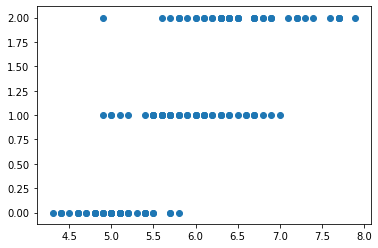

In [8]:
# SepalLength vs species
plt.scatter(iris.SepalLength,
            iris.species)
plt.show()

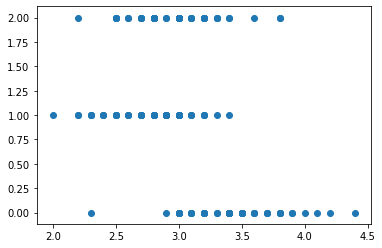

In [9]:
# SepalWidth vs species
plt.scatter(iris.SepalWidth,
            iris.species)
plt.show()

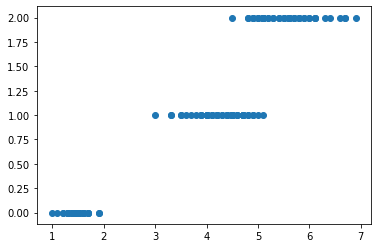

In [10]:
# PetalLength vs species
import matplotlib.pyplot as plt
plt.scatter(iris.PetalLength,
            iris.species)
plt.show()

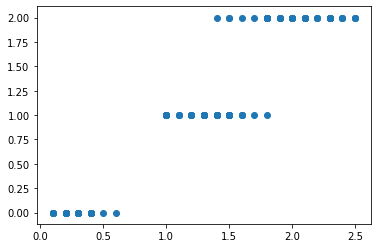

In [11]:
# PetalWidth vs species
import matplotlib.pyplot as plt
plt.scatter(iris.PetalWidth,
            iris.species)
plt.show()

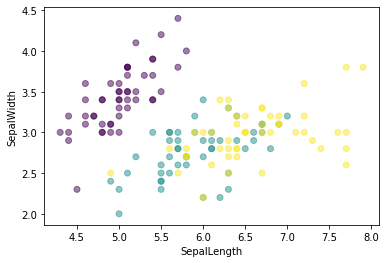

In [12]:
# 4 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLength,
            iris.SepalWidth,
            alpha = 0.5,                             # transeperency level
#            s = 100*iris.PetalLength,                # size of dot depends on petal length
            c = iris.species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

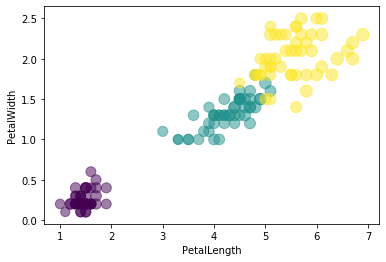

In [13]:
# 4 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.PetalLength,
            iris.PetalWidth,
            alpha = 0.5,                             # transeperency level
            s = 20*iris.SepalLength,                # size of dot depends on petal length
            c = iris.species,                        # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[2])
plt.ylabel(iris.columns.values[3])
plt.show()

In [14]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species',
       'species'],
      dtype='object')

In [14]:
# split the file into Independent and dependent variables
irisX = pd.DataFrame(iris,columns=['SepalLength','SepalWidth'
                                   ,'PetalLength','PetalWidth'])
irisY = pd.DataFrame(iris,columns=['species'])
print(irisX.head())
print(irisY.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
   species
0        0
1        0
2        0
3        0
4        0


In [16]:
np.unique(irisY)

array([0, 1, 2])

In [15]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# initialize LDA
LDA = LinearDiscriminantAnalysis(solver = 'svd',shrinkage=None)
# apply LDA
LDA.fit(irisX, irisY.species)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [16]:
print(LDA.coef_)
print(LDA.intercept_)

[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
[-15.47783673  -2.02197415 -33.53768674]


In [18]:
LDA.decision_function(irisX[0:1])

array([[ 31.33603611, -17.96079368, -64.41274006]])

In [19]:
print(LDA.explained_variance_ratio_)

[0.9912126 0.0087874]


In [61]:
print(LDA.means_)

[[4.99411765 3.38235294 1.45294118 0.23235294]
 [5.921875   2.75625    4.196875   1.30625   ]
 [6.65384615 2.98717949 5.5974359  2.03076923]]


In [30]:
iris_LDA = LDA.transform(irisX)
print(iris_LDA.shape)
print(iris_LDA[0:5])

(150, 2)
[[-8.06179978  0.30042062]
 [-7.12868772 -0.78666043]
 [-7.48982797 -0.26538449]
 [-6.81320057 -0.67063107]
 [-8.13230933  0.51446253]]


In [22]:
LDA1 = pd.DataFrame(iris_LDA)
print(LDA1.columns.values)

[0 1]


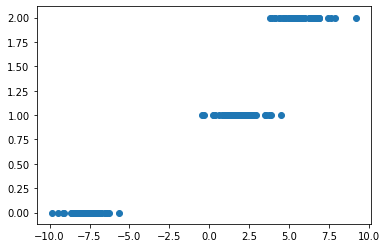

In [23]:
# 3 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(LDA1.iloc[::,0],irisY)
plt.show()

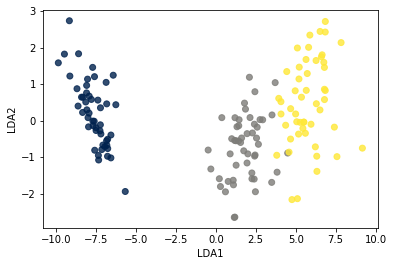

In [24]:
# 3 dimensional plot - 
# different colour maps : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# cmpas: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
import matplotlib.pyplot as plt
plt.scatter(LDA1.iloc[::,0],
            LDA1.iloc[::,1],
            alpha = 0.8,                             # transeperency level
            c = irisY.species,                        # colour based on target/species
            cmap = 'cividis')                        # various colour maps present
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()

In [25]:
# predict on train & test data
predict = LDA.predict(irisX)
print(predict[0:5])

[0 0 0 0 0]


In [27]:
LDA.predict_proba(irisX)[0:5]

array([[1.00000000e+00, 3.89635793e-22, 2.61116827e-42],
       [1.00000000e+00, 7.21796992e-18, 5.04214335e-37],
       [1.00000000e+00, 1.46384895e-19, 4.67593159e-39],
       [1.00000000e+00, 1.26853638e-16, 3.56661049e-35],
       [1.00000000e+00, 1.63738745e-22, 1.08260527e-42]])

In [29]:
# confusion matrix for train
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(irisY,predict))
print (classification_report(irisY,predict))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

